## ICM2813 2020-2
# Proyecto Practico \#1

El siguiente proyecto busca que usted pueda implementar un control PID de modo de poder controlar la posición de un motor con una barra y analizar los resultados.

# Diseño del controlador

Diseñar un controlador que permita mover la barra desde 0 grados (vertical) a 90 grados. Se le solicita que diseñe un controlador que permita hacer esto siguiendo las restricciones definidas en el enunciado del PP1.

In [1]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        
        self.Kp=0
        self.Ki=0
        self.Kd=0
        self.error=0
        self.error_anterior=0
        self.error_acumulado=0
        self.error_derivativo=0
        self.t_ant=0.01

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Almacenar variables que desee aquí
        print("{:.3f},\t{:.2f}".format(t,np.rad2deg(theta)))
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))

       
            
        if t>5:
            theta_ref=np.radians(90)
        else:
            theta_ref = np.radians(0)

        self.error=theta_ref-theta
        delta_t=t-self.t_ant
        self.error_derivativo=(self.error-self.error_anterior)/delta_t
        self.error_acumulado+=self.error

        PWM=50
        #PWM=self.Kp*self.error + self.Kd*self.error_derivativo + self.Ki*self.error_acumulado*delta_t

        self.t_ant=t
        self.error_anterior=self.error
        
        #Detender simulación después de un tiempo
        if t >= 10:
            self.stop()

        return PWM
    

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	0.16
0.050,	-10.87
0.100,	-18.52
0.150,	-18.81
0.200,	-18.26
0.250,	-16.70
0.300,	-14.38
0.350,	-13.48
0.400,	-12.88
0.450,	-10.32
0.500,	-9.57
0.550,	-7.32
0.600,	-6.32
0.650,	-5.23
0.700,	-3.50
0.750,	-2.49
0.800,	-1.40
0.850,	1.31
0.900,	2.97
0.950,	3.92
1.000,	5.40
1.050,	7.40
1.100,	8.78
1.150,	10.89
1.200,	12.16
1.250,	13.39
1.300,	16.14
1.350,	17.83
1.400,	20.11
1.450,	21.89
1.500,	23.84
1.550,	25.18
1.600,	26.78
1.650,	28.25
1.700,	30.64
1.750,	33.71
1.800,	35.17
1.850,	37.62
1.900,	39.94
1.950,	40.87
2.000,	44.42
2.050,	45.46
2.100,	48.57
2.150,	49.90
2.200,	52.81
2.250,	55.50
2.300,	58.06
2.350,	59.67
2.400,	61.42
2.450,	64.73
2.500,	67.33
2.550,	69.93
2.600,	72.48
2.650,	73.70
2.700,	77.07
2.750,	79.74
2.800,

KeyboardInterrupt: 

# Análisis de Resultados
Al terminar la simualción puede graficar y analizar resultados aquí. A continuación un ejemplo que puede modificar libremente. Recuerde entregar gráficos con título, nombre de ejes, unidades, etc.

Populating the interactive namespace from numpy and matplotlib


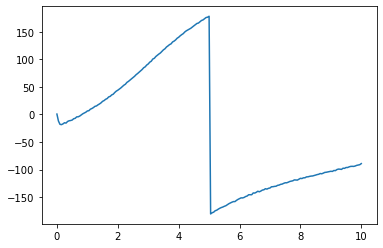

In [2]:
%pylab inline
plot(m.t,m.theta)